In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img1 = cv.imread('3.jpg')
img2 = cv.imread('3-1.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)


blurred1 = cv.GaussianBlur(gray1, (5, 5), 0)
blurred2 = cv.GaussianBlur(gray2, (5, 5), 0)

In [15]:
edges1 = cv.Canny(blurred1, 100, 200)
edges2 = cv.Canny(blurred2, 100, 200)
    
# 4. Apply threshold to get a binary image
ret1, mask1 = cv.threshold(edges1, 160, 255, cv.THRESH_BINARY_INV)
ret2, mask2 = cv.threshold(edges2, 160, 255, cv.THRESH_BINARY_INV)
    
# 5. Apply bilateral filter to reduce the number of colors
color1 = cv.bilateralFilter(img1, 9, 300, 300)
color2 = cv.bilateralFilter(img2, 9, 300, 300)
    
# 6. Combine the edge mask with the reduced color image
cartoon1 = cv.bitwise_and(color1, color1, mask=mask1)
cartoon2 = cv.bitwise_and(color2, color2, mask=mask2)


img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
cartoon1_rgb = cv.cvtColor(cartoon1, cv.COLOR_BGR2RGB)
cartoon2_rgb = cv.cvtColor(cartoon2, cv.COLOR_BGR2RGB)

(-0.5, 405.5, 502.5, -0.5)

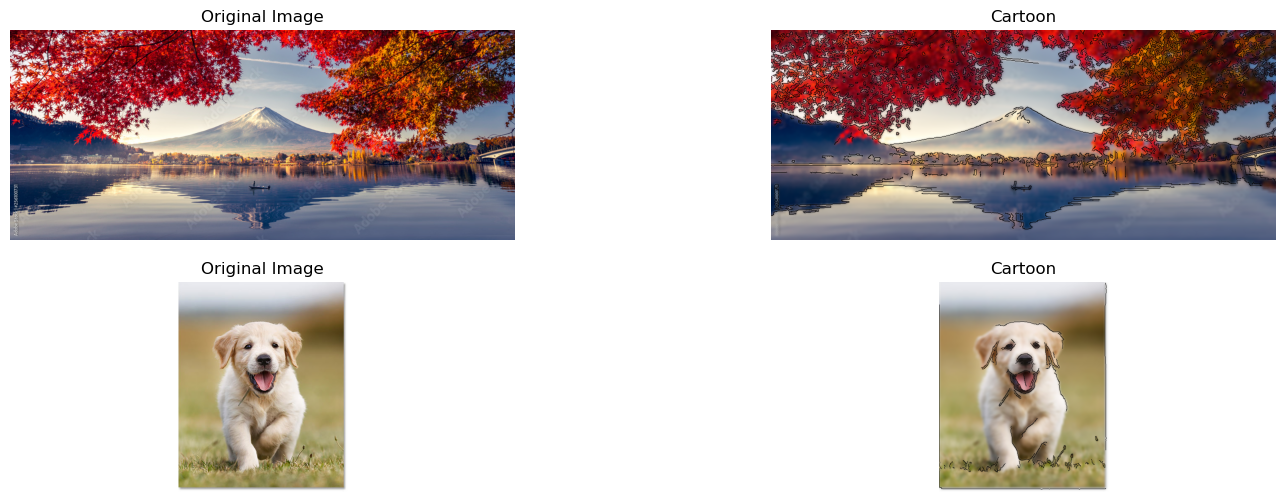

In [17]:
plt.figure(figsize=(18, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img1_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Cartoon')
plt.imshow(cartoon1_rgb)
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Original Image')
plt.imshow(img2_rgb)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Cartoon')
plt.imshow(cartoon2_rgb)
plt.axis('off')